### Improving Computer Vision Accuracy using Convolutions

In [1]:
import tensorflow as tf

print(tf.__version__)

2.3.1


In [2]:
# 이벤트 발생에 따라 콜백 동작 처리.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # loss < 0.4 일 때, 학습 종료.
    if(logs.get('loss') < 0.4):
      print("\nLoss is low, so cancelling training!")
      self.model.stop_training = True

In [3]:
# fashion mnist 데이터 로드.
fashion_mnist = tf.keras.datasets.fashion_mnist

# 의류 품목과 라벨이 담긴 그래픽 이미지 값을 Training Set 과 Test Set으로 구분.
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

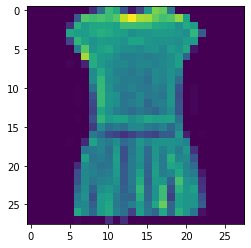

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[3])

In [5]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# 정규화(normalizing) : 신경망에서는 0과 1사이의 숫자의 데이터가 다루기 쉽다.
training_images = training_images / 255.0
test_images = test_images /255.0

In [6]:
model = tf.keras.models.Sequential([
                                    # keras에게 64개의 Convolutional 필터(3x3) 64개 생성 요청.
                                    # input_shape(28, 28, 1) : 1 -> 색생바이트를 단일 바이트(Gray Scale)를 사용함을 의미
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = (28, 28, 1)),
                                    # 2 x 2 픽셀, 즉 4개의 픽셀 중 가장 큰 값이 생존.
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

#### 28 x 28 -> 26 x 26이 된 이유
> 3 x 3 사이즈의 필터를 적용할 수 있는 가장 첫번째 값은 (0, 0)위치의 픽셀값이 아닌 (1, 1) 위치의 픽셀이기 때문에.

In [7]:
# 콜백을 위해 생성한 클래스를 인스턴스화
callbacks = myCallback()

In [8]:
# 학습을 목적으로 모델 정의.
# 최적화 함수(optimizer) : Adam(), 목적함수 f의 최솟값을 찾는 알고리즘
# 손실 함수(loss) : sparse_categorical_crossentropy(다중 분류 손실함수), 한 샘플에 여러 클래스가 있거나 label이 soft 확률일 경우 사용.
# 측정 함수(metrics) : accuracy
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4349
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2920
Epoch 3/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2471
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2168
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1886


In [9]:
# 테스트 데이터를 가지고 평가.
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2823


---

### Vusualization

In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


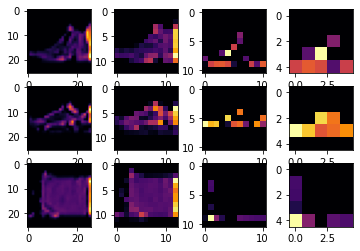

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=9
THIRD_IMAGE=18
CONVOLUTION_NUMBER = 54

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
    
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)